linear {'alpha': 0.01, 'gamma': 0.01}
rbf {'alpha': 0.001, 'gamma': 0.01}
laplacian {'alpha': 0.1, 'gamma': 0.01}
chi2 {'alpha': 1.0, 'gamma': 0.01}
3
linear {'alpha': 1.0, 'gamma': 0.01}
rbf {'alpha': 0.001, 'gamma': 0.01}
laplacian {'alpha': 0.1, 'gamma': 0.01}
chi2 {'alpha': 1.0, 'gamma': 0.01}
3
    Targets  std_data  std_prediction
0  theta_pr   3.56082        3.579059
1      b_pr   0.81555        1.723860
    targets                       MAE  \
0  theta_pr  [3.01, 6.39, 3.32, 2.98]   
1      b_pr   [1.29, 4.15, 0.92, 0.8]   

                                                 MSE  \
0  [3.5972211497209896, 7.188184749990779, 3.9217...   
1  [1.5264337522473748, 4.279018579066934, 1.0770...   

                                                 r_2  \
0  [-0.1786778684227519, -3.7048572970859412, -0....   
1  [-2.4444579336207357, -26.042694812812982, -0....   

                                          pear_coeff  
0  [0.23087961945183488, -0.21668597286266889, 0....  
1  [0.3002455

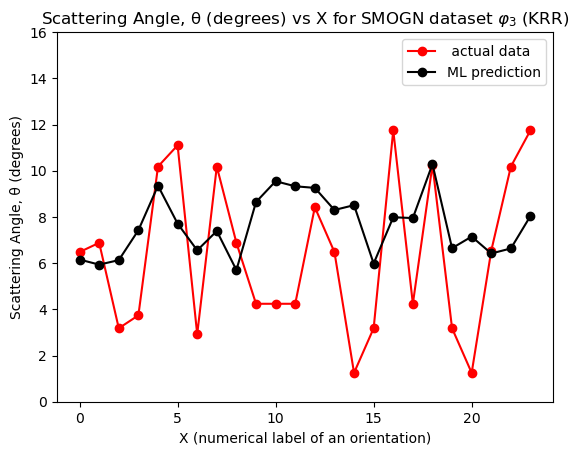

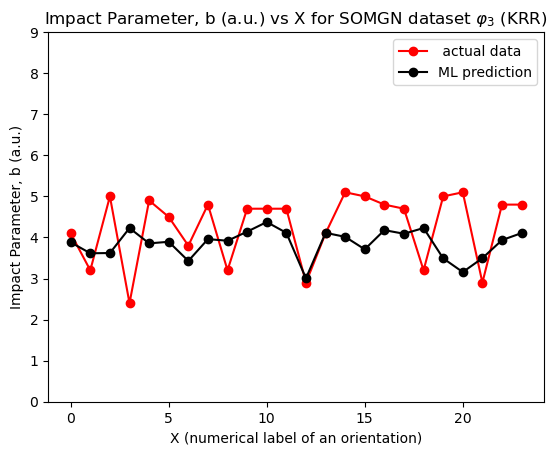

In [1]:
from krr import *    #importing the model
from plot import *

#data preparation
data = pd.read_csv("../c2h4_rainbow_scat_data.csv") #Smogn data are already generated
##data = pd.read_csv("c2h4_mull_pop_phi1.csv") #use this datasets for Mulliken Population prediction
data = data.reset_index()
data = data.drop(columns=['index'])
features = ['Alpha', 'Beta', 'Gamma']  #these 3 are inputs for scatt. angle and impact parameters
#features = ['Alpha', 'Beta', 'Gamma', 'b']  #these 3 are inputs for Mulliken population
target = ['theta_pr','b_pr'] #these  are targets for scatt. angle and impact parameters                                                                          
#target = ['Mull_pop_P'] # #use this target for Mulliken Population prediction 
X_data = data[features].values.reshape(-1, len(features))

krr(data)

std_data = []
std_predict = []

for y in range(0, len(target)):
    std = np.std(y_data_array[y])
    std_yhat = np.std(y_hat_array[y])
    std_data.append(std)
    std_predict.append(std_yhat)

deviations = pd.DataFrame({'Targets' : target, 'std_data' : std_data, 'std_prediction' : std_predict})
print(deviations)

#results = pd.DataFrame({'Targets' : target, 'Kernel' : kernel_list_array,  'MAE' : MAE_array,  'RMSE' : MSE_array, "r_2" : r2_array, 'pear_coeff' : pear_coeff})
#print(results)

#results = pd.DataFrame({'Targets' : target, 'Orders' : order_list_array,  'MAE' : mae_list, 'MSE': mse_list, 'r_2' : r2_list, 'pear_coeff' : pear_coeff})
#print(results)

results = pd.DataFrame({'targets' : target, 'MAE' : MAE_array, 'MSE' : MSE_array, 'r_2' : r2_array, 'pear_coeff' : pear_coeff})
print(results)

plot_scat_angle(y_test_array[0], y_predicted[0])
plot_imp_para(y_test_array[1], y_predicted[1])

#plot_scat_angle(y_test_array[0], y_hat_array[0])
#plot_imp_para(y_test_array[1], y_hat_array[1])(data)